In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os

/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


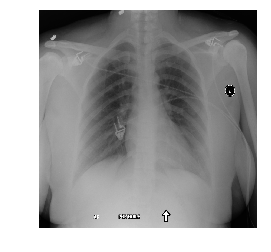

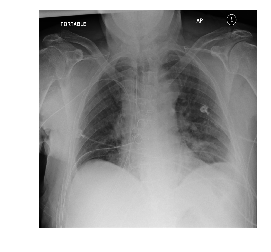

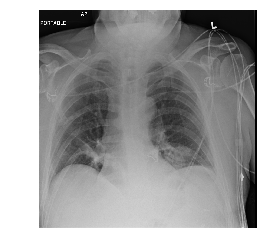

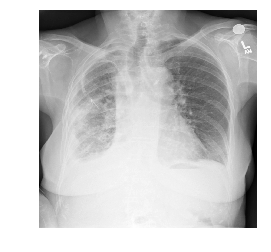

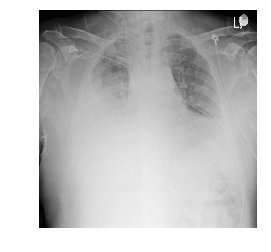

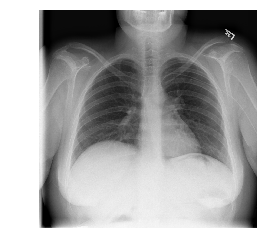

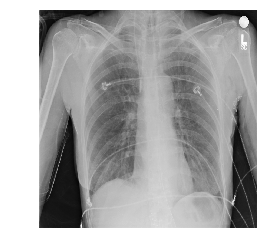

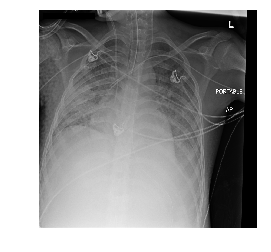

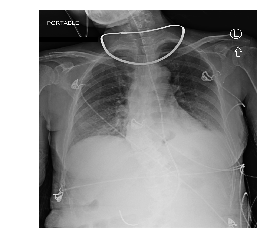

In [3]:
ROOT_FOLDER = '/datadisk/datasets/NIH_Chest_XRay'
IMAGE_FOLDER = '{}/images/'.format(ROOT_FOLDER)

NUM_IMG_DISP = 10
img_count = 0

for entry in os.scandir(IMAGE_FOLDER):
    img_count += 1
    if img_count >= NUM_IMG_DISP:
        break
    if entry.is_file() and entry.path.split(".")[-1] == 'png':
        image = plt.imread(entry.path)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.show()

In [47]:
image

array([[0.06666667, 0.07058824, 0.07058824, ..., 0.04313726, 0.02352941,
        0.        ],
       [0.06666667, 0.07058824, 0.07058824, ..., 0.04313726, 0.01568628,
        0.        ],
       [0.06666667, 0.06666667, 0.06666667, ..., 0.04313726, 0.01568628,
        0.        ],
       ...,
       [0.06666667, 0.05098039, 0.04705882, ..., 0.1254902 , 0.05098039,
        0.        ],
       [0.07058824, 0.06666667, 0.06666667, ..., 0.08235294, 0.05098039,
        0.        ],
       [0.00784314, 0.00784314, 0.00784314, ..., 0.00784314, 0.00784314,
        0.        ]], dtype=float32)

In [4]:
DATA_FILE = '{}/Data_Entry_2017.csv'.format(ROOT_FOLDER)

image_to_label_mapping = {}

flag = False
with open(DATA_FILE) as f:
    for line in f:
        if flag:
            items = line.split(',')
            image_to_label_mapping[items[0]] = items[1]
        else:
            flag = True

In [5]:
label_index_map = {'Atelectasis': 0,
 'Cardiomegaly': 1,
 'Consolidation': 2,
 'Edema': 3,
 'Effusion': 4,
 'Emphysema': 5,
 'Fibrosis': 6,
 'Hernia': 7,
 'Infiltration': 8,
 'Mass': 9,
 'No Finding': 10,
 'Nodule': 11,
 'Pleural_Thickening': 12,
 'Pneumonia': 13,
 'Pneumothorax': 14}

In [6]:
TRAINING_FILE = '{}/train_val_list.txt'.format(ROOT_FOLDER)
TEST_FILE = '{}/test_list.txt'.format(ROOT_FOLDER)
unique_labels = {}
training_set = {}
test_set = {}
with open(TRAINING_FILE) as f:
    for line in f:
        current_file = line.strip('\n')
        labels = image_to_label_mapping[current_file].split('|')
        training_set[current_file] = np.zeros(shape=(15), dtype=np.uint8)
        for label in labels:
            #if label not in unique_labels.keys():
            #   unique_labels[label] = 0
            #unique_labels[label] += 1
            if label in label_index_map.keys():
                training_set[current_file][label_index_map[label]] = 1
        

In [7]:
with open(TEST_FILE) as f:
    for line in f:
        current_file = line.strip('\n')
        labels = image_to_label_mapping[current_file].split('|')
        test_set[current_file] = np.zeros(shape=(15), dtype=np.uint8)
        for label in labels:
            if label in label_index_map.keys():
                test_set[current_file][label_index_map[label]] = 1

In [45]:
print('Training set size: {} Test set size: {}'.format(len(training_set), len(test_set)))

#Randomly shuffle training set based on filename key

Training set size: 86524 Test set size: 25596
